In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

In [3]:
#carrega os arrays de imagens e de classes
X = np.load("D:/Displasia/displasiaDataAug/displasiaOriginalDataX_teste3.npy")
Y = np.load("D:/Displasia/displasiaDataAug/displasiaOriginalDataYOneHot_teste3.npy")
#dataX = np.load("Image Arrays/displasiaGeneratedDataX.npy")
#dataY = np.load("Image Arrays/displasiaGeneratedDataY.npy")
#Y=np.argmax(Y,axis=1)
#shape dos arrays
X.shape, Y.shape

((75776, 32, 32, 3), (75776, 4))

In [4]:
from sklearn.model_selection import train_test_split

#divide os dados em 80% para treino e 20% para teste
#train_X, test_X, train_label, test_label = train_test_split(X, Y, test_size=0.2, random_state=13)

#divide os dados de treino em 80% para treino e 20% para validação
#train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_label, test_size=0.2, random_state=13)

#mostra os shapes resultantes das divisões
#print("Training:   ", train_X.shape, train_label.shape)
#print("Validation: ", valid_X.shape, valid_label.shape)
#print("Testing:    ", test_X.shape, test_label.shape)

In [5]:
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

D:\Anaconda\envs\tf-gpu\lib\site-packages\tensorflow\python\keras\backend.py:435: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [6]:
model = tf.keras.applications.EfficientNetB1(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(32,32,3),
    pooling=None,
    classes=4,
    classifier_activation="softmax",
#    **kwargs
)

In [7]:
model.summary()

Model: "efficientnetb1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 32, 32, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 32, 32, 3)    7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 33, 33, 3)    0           normalization[0][0]              
_____________________________________________________________________________________

Epoch 1/70
758/758 [==============================] - 77s 81ms/step - loss: 0.7543 - accuracy: 0.6934 - val_loss: 0.3936 - val_accuracy: 0.8428
Epoch 2/70
758/758 [==============================] - 61s 80ms/step - loss: 0.3554 - accuracy: 0.8673 - val_loss: 0.2141 - val_accuracy: 0.9167
Epoch 3/70
758/758 [==============================] - 60s 79ms/step - loss: 0.2476 - accuracy: 0.9085 - val_loss: 0.2617 - val_accuracy: 0.9049
Epoch 4/70
758/758 [==============================] - 60s 80ms/step - loss: 0.1989 - accuracy: 0.9293 - val_loss: 0.2102 - val_accuracy: 0.9183
Epoch 5/70
758/758 [==============================] - 60s 79ms/step - loss: 0.1626 - accuracy: 0.9414 - val_loss: 0.1477 - val_accuracy: 0.9475
Epoch 6/70
758/758 [==============================] - 60s 80ms/step - loss: 0.1337 - accuracy: 0.9530 - val_loss: 0.0846 - val_accuracy: 0.9680
Epoch 7/70
758/758 [==============================] - 60s 80ms/step - loss: 0.1148 - accuracy: 0.9609 - val_loss: 0.1008 - val_accuracy:

D:\Anaconda\envs\tf-gpu\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: D:/Modelos/EfficientNet_B1_IMAGENET_IC_KFOLD1\assets
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      3867
     Class 1       0.99      0.99      0.99      3755
     Class 2       0.98      0.99      0.99      3686
     Class 3       1.00      0.99      0.99      3848

   micro avg       0.99      0.99      0.99     15156
   macro avg       0.99      0.99      0.99     15156
weighted avg       0.99      0.99      0.99     15156
 samples avg       0.99      0.99      0.99     15156

Precision:   [0.99587523 0.99036145 0.98437079 0.9963456 ]
Sensitivity: [0.99896561 0.98508655 0.99104721 0.99194387]
Specificity: [0.99858269 0.99684238 0.99494333 0.99876194]
F1-score:    [0.99741802 0.98771696 0.98769772 0.99413986]
Accuracy:    [0.99868039 0.9939298  0.99399578 0.99703088]

[[0.99587523 0.99896561 0.99858269 0.99741802 0.99868039]
 [0.99036145 0.98508655 0.99684238 0.98771696 0.9939298 ]
 [0.9843707

Epoch 50/70
758/758 [==============================] - 60s 80ms/step - loss: 0.0072 - accuracy: 0.9977 - val_loss: 0.0110 - val_accuracy: 0.9970
Epoch 51/70
758/758 [==============================] - 61s 81ms/step - loss: 0.0118 - accuracy: 0.9966 - val_loss: 0.0779 - val_accuracy: 0.9791
Epoch 52/70
758/758 [==============================] - 61s 81ms/step - loss: 0.0084 - accuracy: 0.9974 - val_loss: 0.0130 - val_accuracy: 0.9957
Epoch 53/70
758/758 [==============================] - 61s 80ms/step - loss: 0.0096 - accuracy: 0.9971 - val_loss: 0.0133 - val_accuracy: 0.9950
Epoch 54/70
758/758 [==============================] - 60s 79ms/step - loss: 0.0127 - accuracy: 0.9964 - val_loss: 0.0813 - val_accuracy: 0.9788
Epoch 55/70
758/758 [==============================] - 61s 81ms/step - loss: 0.0070 - accuracy: 0.9980 - val_loss: 0.0180 - val_accuracy: 0.9965
Epoch 56/70
758/758 [==============================] - 61s 80ms/step - loss: 0.0072 - accuracy: 0.9978 - val_loss: 0.0048 - val_ac

D:\Anaconda\envs\tf-gpu\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: D:/Modelos/EfficientNet_B1_IMAGENET_IC_KFOLD2\assets
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      3761
     Class 1       1.00      1.00      1.00      3776
     Class 2       1.00      1.00      1.00      3819
     Class 3       1.00      1.00      1.00      3799

   micro avg       1.00      1.00      1.00     15155
   macro avg       1.00      1.00      1.00     15155
weighted avg       1.00      1.00      1.00     15155
 samples avg       1.00      1.00      1.00     15155

Precision:   [0.99920128 0.99604222 0.99973698 0.99763593]
Sensitivity: [0.99787291 0.99973517 0.99528672 0.99973677]
Specificity: [0.9997367  0.99868178 0.99991179 0.99920747]
F1-score:    [0.99853665 0.99788528 0.99750689 0.99868525]
Accuracy:    [0.99927417 0.99894424 0.99874629 0.99934015]

[[0.99920128 0.99787291 0.9997367  0.99853665 0.99927417]
 [0.99604222 0.99973517 0.99868178 0.99788528 0.99894424]
 [0.9997369

D:\Anaconda\envs\tf-gpu\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: D:/Modelos/EfficientNet_B1_IMAGENET_IC_KFOLD3\assets
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      3802
     Class 1       1.00      1.00      1.00      3797
     Class 2       1.00      1.00      1.00      3741
     Class 3       1.00      1.00      1.00      3815

   micro avg       1.00      1.00      1.00     15155
   macro avg       1.00      1.00      1.00     15155
weighted avg       1.00      1.00      1.00     15155
 samples avg       1.00      1.00      1.00     15155

Precision:   [0.99973698 0.99789474 0.99866417 0.99973753]
Sensitivity: [0.99973698 0.99868317 0.99919808 0.99842726]
Specificity: [0.99991192 0.99929565 0.99956194 0.99991182]
F1-score:    [0.99973698 0.9982888  0.99893105 0.99908197]
Accuracy:    [0.99986803 0.9991422  0.99947212 0.99953811]

[[0.99973698 0.99973698 0.99991192 0.99973698 0.99986803]
 [0.99789474 0.99868317 0.99929565 0.9982888  0.9991422 ]
 [0.9986641

Epoch 50/70
758/758 [==============================] - 62s 82ms/step - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.0044 - val_accuracy: 0.9986
Epoch 51/70
758/758 [==============================] - 62s 82ms/step - loss: 0.0035 - accuracy: 0.9990 - val_loss: 0.0042 - val_accuracy: 0.9989
Epoch 52/70
758/758 [==============================] - 62s 82ms/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.0128 - val_accuracy: 0.9962
Epoch 53/70
758/758 [==============================] - 63s 83ms/step - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.0036 - val_accuracy: 0.9991
Epoch 54/70
758/758 [==============================] - 62s 82ms/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.0110 - val_accuracy: 0.9981
Epoch 55/70
758/758 [==============================] - 62s 82ms/step - loss: 0.0041 - accuracy: 0.9989 - val_loss: 0.0565 - val_accuracy: 0.9978
Epoch 56/70
758/758 [==============================] - 62s 82ms/step - loss: 0.0057 - accuracy: 0.9985 - val_loss: 0.9302 - val_ac

D:\Anaconda\envs\tf-gpu\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: D:/Modelos/EfficientNet_B1_IMAGENET_IC_KFOLD4\assets
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      3655
     Class 1       1.00      1.00      1.00      3841
     Class 2       1.00      1.00      1.00      3840
     Class 3       1.00      1.00      1.00      3819

   micro avg       1.00      1.00      1.00     15155
   macro avg       1.00      1.00      1.00     15155
weighted avg       1.00      1.00      1.00     15155
 samples avg       1.00      1.00      1.00     15155

Precision:   [0.997816   0.997921   0.99973904 0.99973767]
Sensitivity: [1.         0.99973965 0.99765625 0.99790521]
Specificity: [0.99930435 0.99929291 0.99991162 0.99991179]
F1-score:    [0.99890681 0.9988295  0.99869656 0.9988206 ]
Accuracy:    [0.99947212 0.99940614 0.99934015 0.99940614]

[[0.997816   1.         0.99930435 0.99890681 0.99947212]
 [0.997921   0.99973965 0.99929291 0.9988295  0.99940614]
 [0.9997390

Epoch 50/70
758/758 [==============================] - 65s 86ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0060 - val_accuracy: 0.9997
Epoch 51/70
758/758 [==============================] - 62s 82ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 8.6234e-04 - val_accuracy: 0.9998
Epoch 52/70
758/758 [==============================] - 62s 82ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 7.8485e-04 - val_accuracy: 0.9998
Epoch 53/70
758/758 [==============================] - 63s 83ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.0046 - val_accuracy: 0.9984
Epoch 54/70
758/758 [==============================] - 65s 85ms/step - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.0046 - val_accuracy: 0.9993
Epoch 55/70
758/758 [==============================] - 64s 85ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0159 - val_accuracy: 0.9980
Epoch 56/70
758/758 [==============================] - 65s 86ms/step - loss: 0.0049 - accuracy: 0.9987 - val_loss: 0.1127 

D:\Anaconda\envs\tf-gpu\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: D:/Modelos/EfficientNet_B1_IMAGENET_IC_KFOLD5\assets
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      3859
     Class 1       1.00      1.00      1.00      3775
     Class 2       1.00      1.00      1.00      3858
     Class 3       1.00      1.00      1.00      3663

   micro avg       1.00      1.00      1.00     15155
   macro avg       1.00      1.00      1.00     15155
weighted avg       1.00      1.00      1.00     15155
 samples avg       1.00      1.00      1.00     15155

Precision:   [0.99974093 0.9997351  1.         0.999727  ]
Sensitivity: [1.        0.9997351 0.9997408 0.999727 ]
Specificity: [0.99991147 0.99991213 1.         0.99991298]
F1-score:    [0.99987045 0.9997351  0.99987038 0.999727  ]
Accuracy:    [0.99993402 0.99986803 0.99993402 0.99986803]

[[0.99974093 1.         0.99991147 0.99987045 0.99993402]
 [0.9997351  0.9997351  0.99991213 0.9997351  0.99986803]
 [1.         0.

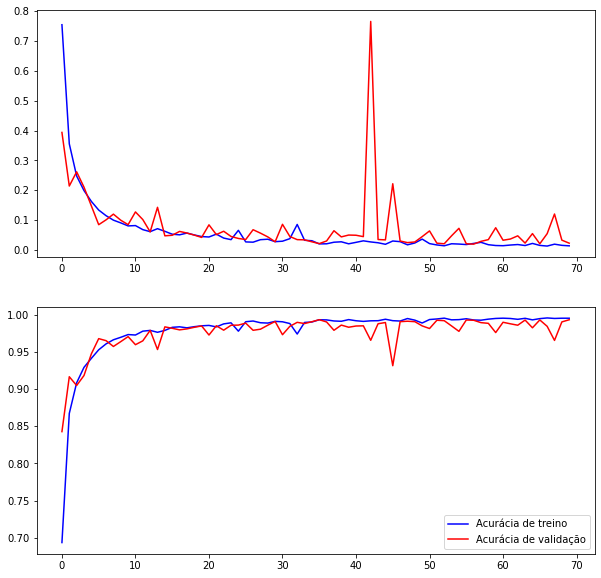

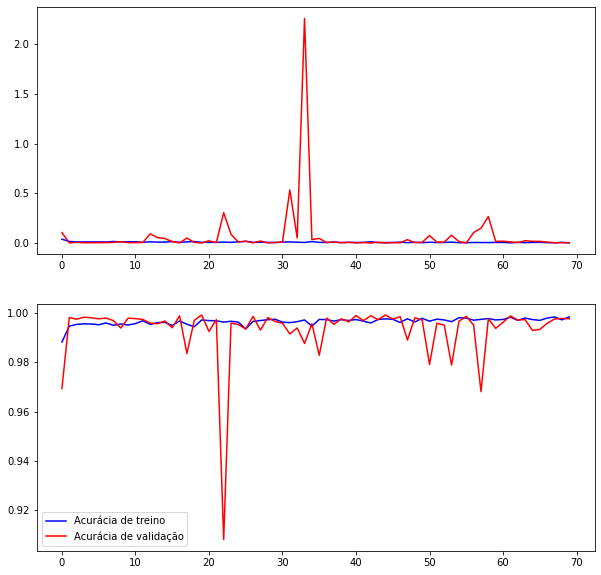

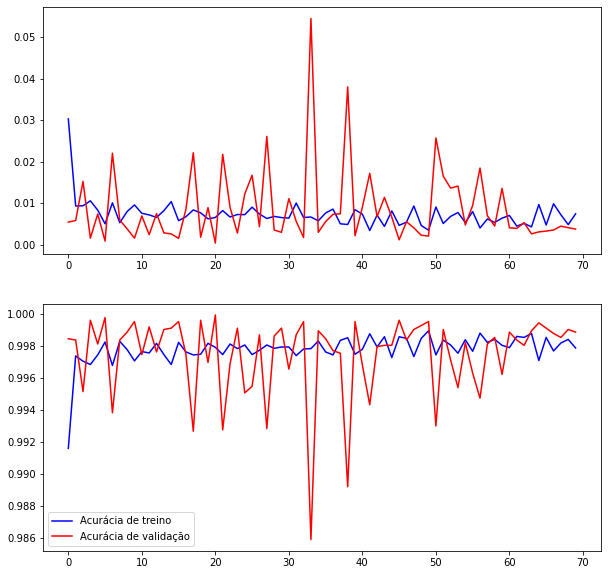

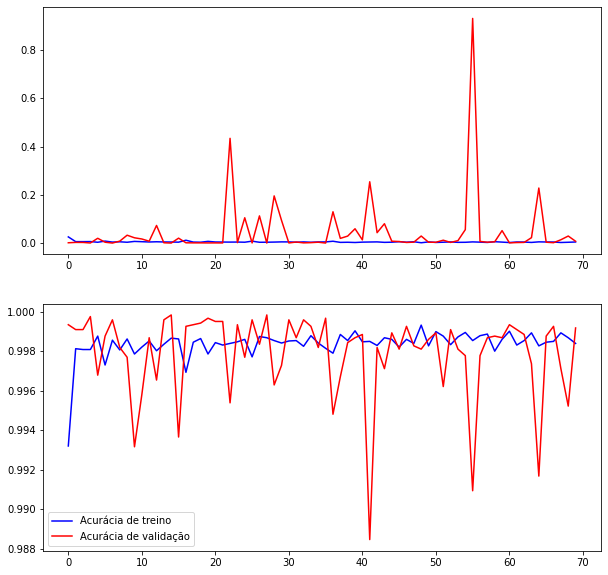

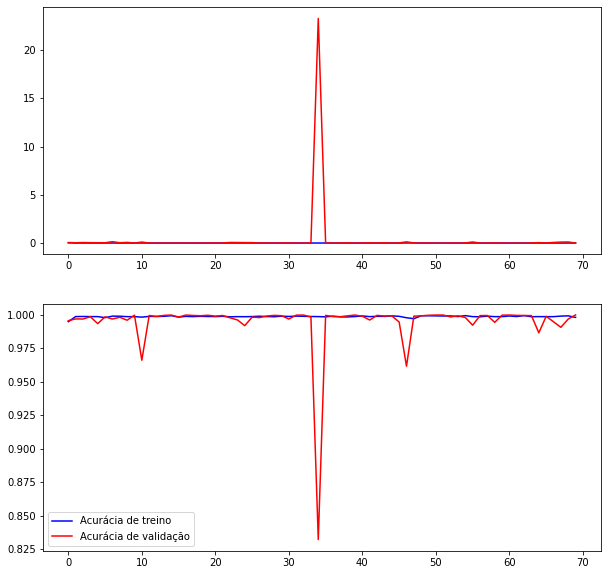

In [8]:
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
#kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
kfold = KFold(n_splits=5, shuffle=True, random_state=7)
cvscores = []
batch_size = 64
epochs = 70
num_classes = 4
num_kfold=1
#from tensorflow.keras.layers import Activation, Dense
#new_model = GlobalAveragePooling2D()(model)
#drop = Dropout(0.2)(new_model)
#new_model2 = Dense(4,activation='relu')(drop)

#new_model3 = Model(inputs=model.input, outputs=new_model)
#layers.GlobalAveragePooling2D(
#    data_format=None, keepdims=False, #**kwargs
#)

mean = [[[],[],[],[],[]],
         [[],[],[],[],[]],
         [[],[],[],[],[]],
         [[],[],[],[],[]]]

std = [[[],[],[],[],[]],
         [[],[],[],[],[]],
         [[],[],[],[],[]],
         [[],[],[],[],[]]]

for train, test in kfold.split (X, Y):
    
    #divide os dados de treino em 80% para treino e 20% para validação
    train_X, valid_X, train_label, valid_label = train_test_split(X[train], Y[train], test_size=0.2, random_state=13)

    new_model = models.Sequential()
    new_model.add(model)
    new_model.add(layers.GlobalAveragePooling2D())
    new_model.add(layers.Dropout(0.5))
    new_model.add(Dense(4,activation='softmax'))

    new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = new_model.fit(train_X, train_label, batch_size=batch_size,
                                epochs=epochs,verbose=1,validation_data=(valid_X, valid_label),shuffle=True)
    

#mostra os gráficos de acurácia e perda da fase de treino

#    accuracy = model_train.history['accuracy']
#    val_accuracy = model_train.history['val_accuracy']
#    loss = model_train.history['loss']
#    val_loss = model_train.history['val_loss']
#    epochs = range(len(accuracy))
#    plt.plot(epochs, accuracy, 'b', label='Training accuracy')
#    plt.plot(epochs, val_accuracy, 'g', label='Validation accuracy')
#    plt.title('Training and validation accuracy')
#    plt.legend()
#    plt.figure()
#    plt.plot(epochs, loss, 'b', label='Training loss')
#    plt.plot(epochs, val_loss, 'g', label='Validation loss')
#    plt.title('Training and validation loss')
#    plt.legend()
#    plt.show()
    
#    scores = new_model.evaluate(test_X,test_label,verbose=0)
#    print("%s: %.2f%%" %(new_model.metrics_names[1],scores[1]*100))
#    cvscores.append(scores[1]*100)
    
    new_model.history.history.keys()
    f,ax=plt.subplots(2,1,figsize=(10,10)) 

    #Assigning the first subplot to graph training loss and validation loss
    ax[0].plot(new_model.history.history['loss'],color='b',label='Perda de treino')
    ax[0].plot(new_model.history.history['val_loss'],color='r',label='Perda de validação')

    #Plotting the training accuracy and validation accuracy
    ax[1].plot(new_model.history.history['accuracy'],color='b',label='Acurácia de treino')
    ax[1].plot(new_model.history.history['val_accuracy'],color='r',label='Acurácia de validação')

    plt.legend()
    print('Accuracy Score = ',np.max(history.history['val_accuracy']))

    scores = new_model.evaluate(X[test],Y[test],verbose=0)
    print("%s: %.2f%%" %(new_model.metrics_names[1],scores[1]*100))
    cvscores.append(scores[1]*100)
    
    new_model.save("D:/Modelos/EfficientNet_B1_IMAGENET_IC_KFOLD" + str(num_kfold))
    num_kfold = num_kfold + 1
    
    #faz a predição das imagens

    from keras.utils import to_categorical

    predicted_classes = new_model.predict(X[test])

    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

    predicted_classes = to_categorical(predicted_classes)
    

    from sklearn.metrics import classification_report
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    print(classification_report(Y[test], predicted_classes, target_names=target_names))
    
    from sklearn.metrics import confusion_matrix

    #converte os arrays de classe de one-hot para númerico
    test_label_aux = np.argmax(Y[test], axis=1)
    predicted_classes = np.argmax(predicted_classes, axis=1)

    #gera a matriz de confusão a partir da predição feita
    cm = confusion_matrix(test_label_aux, predicted_classes)

    #gera os valores de falso positivo, falso negativo, verdadeiro positivo e verdadeiro negativo
    fp = cm.sum(axis=0) - np.diag(cm)  
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)

    #gera a sensitividade, especificidade, acurácia e precisão
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    accuracy    = (tp + tn) / (tp + tn + fp + fn)
    precision   = tp / (tp + fp)
    f1_score = 2/((1/precision)+(1/sensitivity))

    #mostra os resultados
    print("Precision:  ", precision)
    print("Sensitivity:", sensitivity)
    print("Specificity:", specificity)
    print("F1-score:   ", f1_score)
    print("Accuracy:   ", accuracy)
    
    x = []
    x.append(precision)
    x.append(sensitivity)
    x.append(specificity)
    x.append(f1_score)
    x.append(accuracy)
    
    x = np.asarray(x)
    
    x = x.transpose()
    print()
    print(x)
    
    for i in range(4):
        for j in range(5):
            mean[i][j].append(x[i][j])
            std[i][j].append(x[i][j])

In [9]:
mean = np.asarray(mean)
std = np.asarray(std)
for i in mean:
    print(np.mean(i,axis=1))
print()
for i in std:
    print(np.std(i,axis=1))

[0.99847408 0.9993151  0.99948943 0.99889378 0.99944574]
[0.9963909  0.99659593 0.99880497 0.99649113 0.99825808]
[0.9965022  0.99658581 0.99886574 0.99654052 0.99829767]
[0.99863675 0.99754802 0.9995412  0.99809094 0.99903666]

[0.00147755 0.00081464 0.00050482 0.00089112 0.00045445]
[0.00323303 0.00576913 0.00105561 0.00443064 0.00218616]
[0.0060831  0.00317136 0.00196696 0.00448509 0.00218409]
[0.00140452 0.00289295 0.00047572 0.00200776 0.00101925]


In [13]:
print("%.2f%% (+/- %.2f%%)" %(np.mean(cvscores),np.std(cvscores)))

99.75% (+/- 0.28%)
